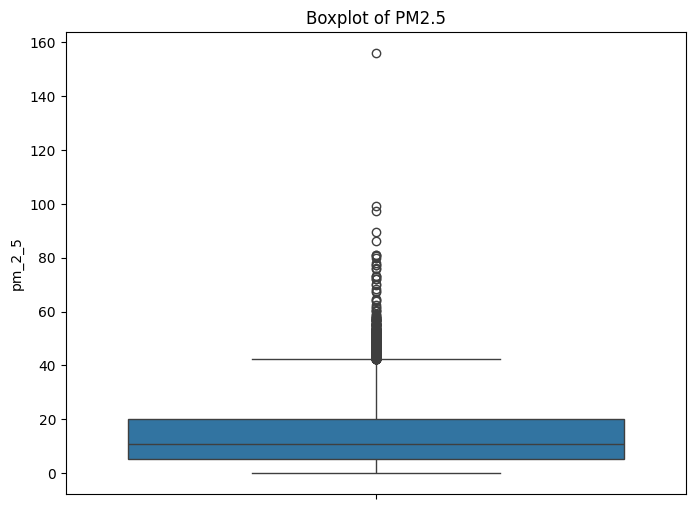

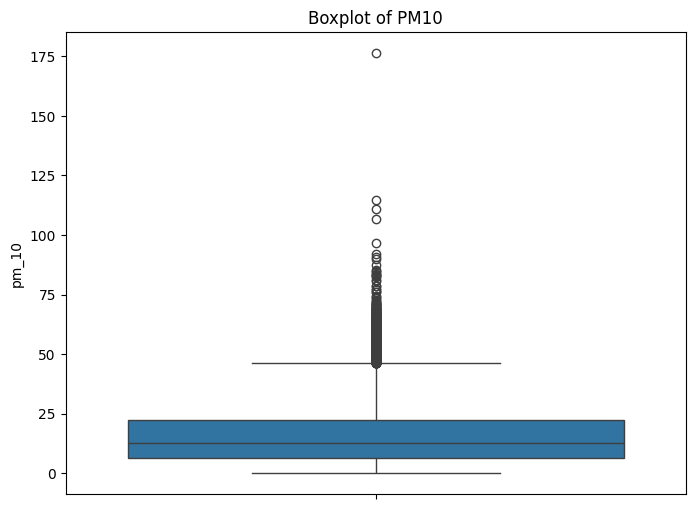

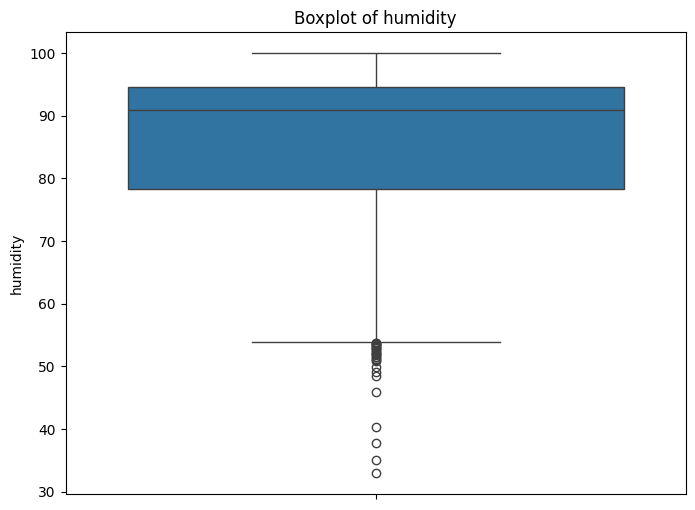

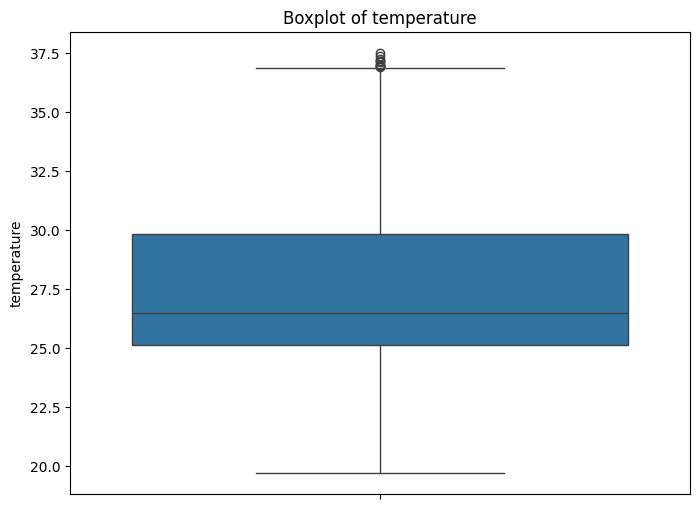

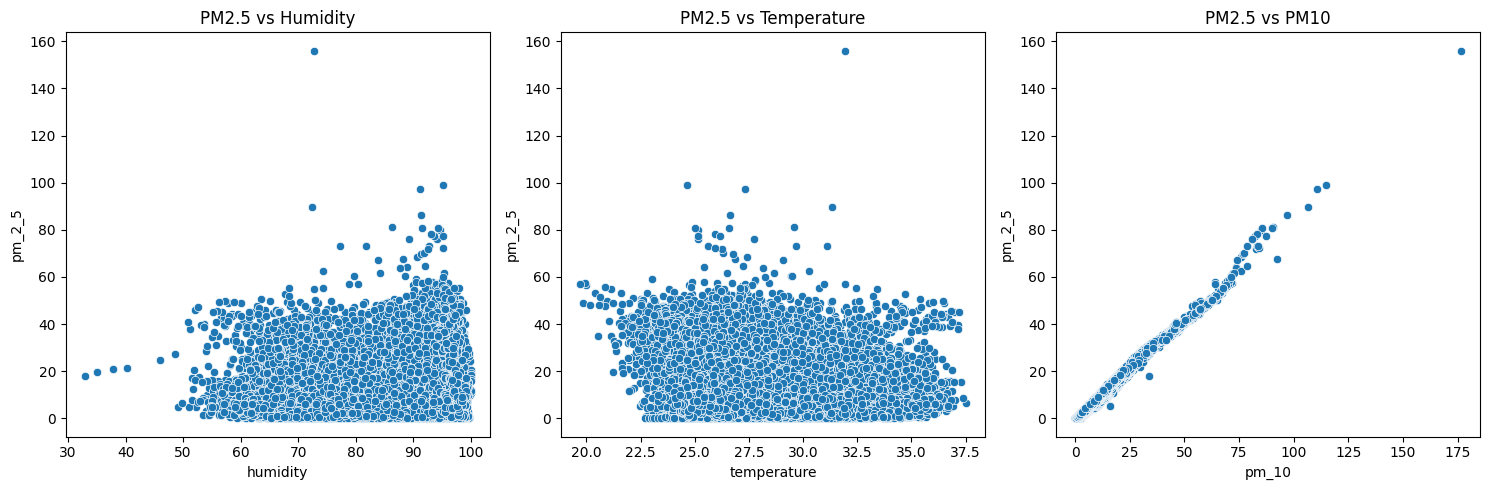

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# อ่านข้อมูล (สมมติว่าเป็นไฟล์ CSV)
df = pd.read_excel("pm-data/export-114BF8ABF5AB-1h.xlsx")

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm2.5
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["pm_2_5"])
plt.title("Boxplot of PM2.5")
plt.show()

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm10
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["pm_10"])
plt.title("Boxplot of PM10")
plt.show()

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm10
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["humidity"])
plt.title("Boxplot of humidity")
plt.show()

# พล็อต Boxplot เพื่อตรวจสอบค่าผิดปกติของ pm10
plt.figure(figsize=(8, 6))
sns.boxplot(y=df["temperature"])
plt.title("Boxplot of temperature")
plt.show()

# พล็อต scatter plot เพื่อดูความสัมพันธ์ของ pm2.5 กับตัวแปรอื่น ๆ
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=df["humidity"], y=df["pm_2_5"], ax=axes[0])
axes[0].set_title("PM2.5 vs Humidity")

sns.scatterplot(x=df["temperature"], y=df["pm_2_5"], ax=axes[1])
axes[1].set_title("PM2.5 vs Temperature")

sns.scatterplot(x=df["pm_10"], y=df["pm_2_5"], ax=axes[2])
axes[2].set_title("PM2.5 vs PM10")

plt.tight_layout()
plt.show()

In [19]:
Q1 = df["pm_2_5"].quantile(0.25)
Q3 = df["pm_2_5"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["pm_2_5"] < lower_bound) | (df["pm_2_5"] > upper_bound)]
print(outliers)  # แสดงค่าผิดปกติ

       Unnamed: 0           timestamp      timezone   humidity      pm_10  \
67             67 2021-02-14 07:00:00  Asia/Bangkok  95.402722  52.010526   
92             92 2021-02-15 08:00:00  Asia/Bangkok  96.599863  52.324786   
105           105 2021-02-15 21:00:00  Asia/Bangkok  92.038296  56.860870   
129           129 2021-02-16 21:00:00  Asia/Bangkok  89.092645  52.525862   
130           130 2021-02-16 22:00:00  Asia/Bangkok  90.660260  53.099099   
...           ...                 ...           ...        ...        ...   
21006       21006 2024-07-28 12:00:00  Asia/Bangkok  84.303044  57.631579   
21007       21007 2024-07-28 13:00:00  Asia/Bangkok  83.163825  56.987654   
21008       21008 2024-07-28 14:00:00  Asia/Bangkok  85.782473  57.284404   
21635       21635 2024-09-01 19:00:00  Asia/Bangkok  81.741961  83.531250   
21641       21641 2024-09-02 01:00:00  Asia/Bangkok  92.129546  78.526316   

          pm_2_5  temperature  
67     42.378947    23.318713  
92     42.7

   Unnamed: 0           timestamp      timezone   humidity     pm_10  \
0           0 2021-02-11 12:00:00  Asia/Bangkok  74.844067  7.045977   
1           1 2021-02-11 13:00:00  Asia/Bangkok  70.873002  9.219048   
2           2 2021-02-11 14:00:00  Asia/Bangkok  70.850209  8.513514   
3           3 2021-02-11 15:00:00  Asia/Bangkok  70.122849  8.133929   
4           4 2021-02-11 16:00:00  Asia/Bangkok  73.741493  9.000000   

     pm_2_5  temperature  
0  5.620690    29.962665  
1  7.742857    31.094025  
2  7.252252    31.122221  
3  6.723214    31.482770  
4  7.530120    30.101388  


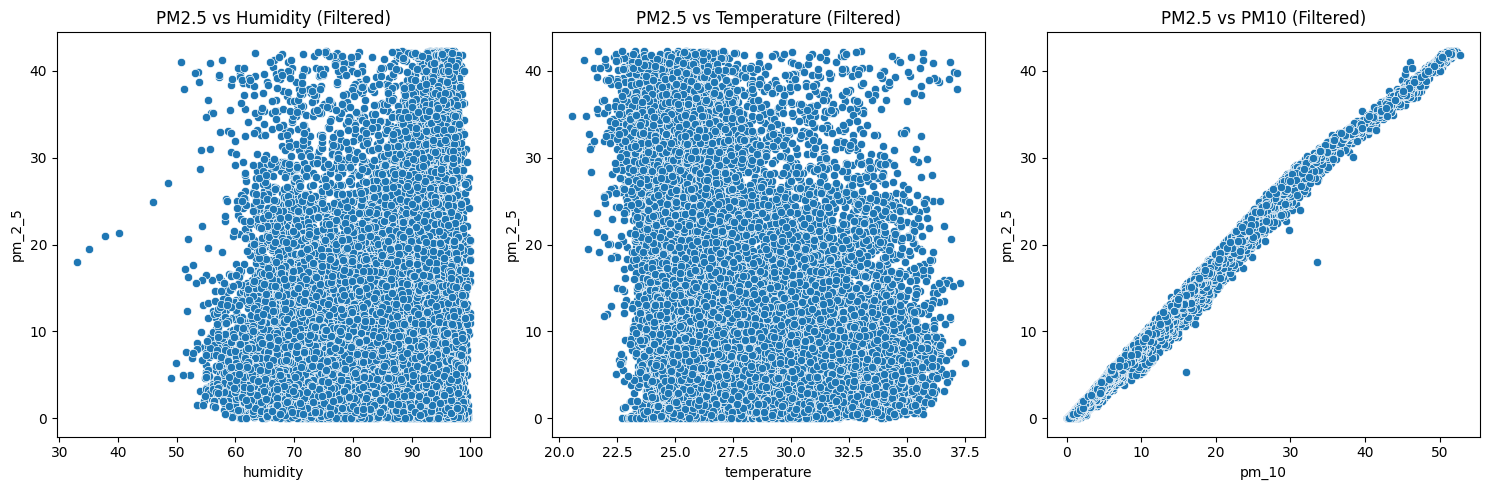

In [20]:
# สร้าง DataFrame ใหม่ที่กรองค่าผิดปกติออกไป
df_filtered = df[(df["pm_2_5"] >= lower_bound) & (df["pm_2_5"] <= upper_bound)]

# ดูข้อมูลหลังจากกรองแล้ว
print(df_filtered.head())

# พล็อตกราฟใหม่เพื่อดูข้อมูลที่ไม่มี outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(x=df_filtered["humidity"], y=df_filtered["pm_2_5"], ax=axes[0])
axes[0].set_title("PM2.5 vs Humidity (Filtered)")

sns.scatterplot(x=df_filtered["temperature"], y=df_filtered["pm_2_5"], ax=axes[1])
axes[1].set_title("PM2.5 vs Temperature (Filtered)")

sns.scatterplot(x=df_filtered["pm_10"], y=df_filtered["pm_2_5"], ax=axes[2])
axes[2].set_title("PM2.5 vs PM10 (Filtered)")

plt.tight_layout()
plt.show()


In [32]:
# ตรวจสอบแถวที่เป็น outliers
outliers = df[(df["pm_10"] < lower_bound) | (df["pm_10"] > upper_bound)]
print(outliers)

       Unnamed: 0           timestamp      timezone   humidity      pm_10  \
58             58 2021-02-13 22:00:00  Asia/Bangkok  90.903535  44.034188   
59             59 2021-02-13 23:00:00  Asia/Bangkok  92.430915  44.547826   
60             60 2021-02-14 00:00:00  Asia/Bangkok  93.089898  42.827586   
61             61 2021-02-14 01:00:00  Asia/Bangkok  93.386781  43.834783   
62             62 2021-02-14 02:00:00  Asia/Bangkok  94.277833  42.758621   
...           ...                 ...           ...        ...        ...   
21635       21635 2024-09-01 19:00:00  Asia/Bangkok  81.741961  83.531250   
21636       21636 2024-09-01 20:00:00  Asia/Bangkok  87.263557  45.500000   
21641       21641 2024-09-02 01:00:00  Asia/Bangkok  92.129546  78.526316   
21644       21644 2024-09-02 04:00:00  Asia/Bangkok  94.233710  42.888889   
21707       21707 2024-09-04 19:00:00  Asia/Bangkok  84.745093  46.250000   

          pm_2_5  temperature  
58     36.213675    24.836285  
59     36.5

In [37]:
# ลบแถวที่มีค่า pm_10 มากกว่า 46.250000
df_filtered2 = df[df["pm_10"] <= 42.758621]

In [38]:
# ตรวจสอบว่า df_filtered ไม่มีค่า pm_10 ที่เกิน 46.250000
print(df_filtered2[df_filtered2["pm_10"] > 42.758621])

Empty DataFrame
Columns: [Unnamed: 0, timestamp, timezone, humidity, pm_10, pm_2_5, temperature]
Index: []


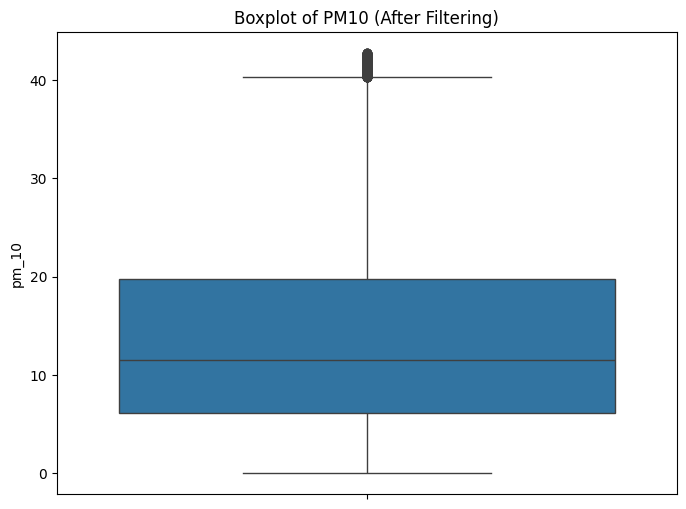

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_filtered2["pm_10"])
plt.title("Boxplot of PM10 (After Filtering)")
plt.show()

In [ ]:
# คำนวณ Q1, Q3 และ IQR สำหรับ pm_10
Q1 = df_filtered2["pm_10"].quantile(0.25)
Q3 = df_filtered2["pm_10"].quantile(0.75)
IQR = Q3 - Q1

# คำนวณ lower bound และ upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ตรวจสอบแถวที่เป็น outliers
outliers = df_filtered2[(df_filtered2["pm_10"] < lower_bound) | (df_filtered2["pm_10"] > upper_bound)]

# หาค่าต่ำสุดที่เป็น outliers
min_outlier = outliers["pm_10"].min()

# แสดงค่าต่ำสุดที่เป็น outliers
print(f"ค่าต่ำสุดที่เป็น outlier: {min_outlier}")

ค่าต่ำสุดที่เป็น outlier: 40.29807692307692


In [44]:
# ลบแถวที่มีค่า pm_10 มากกว่า 46.250000
df_filtered2 = df[df["pm_10"] <= 40.29807692307692]

In [45]:
# ตรวจสอบว่า df_filtered ไม่มีค่า pm_10 ที่เกิน 40.29807692307692
print(df_filtered2[df_filtered2["pm_10"] > 40.29807692307692])

Empty DataFrame
Columns: [Unnamed: 0, timestamp, timezone, humidity, pm_10, pm_2_5, temperature]
Index: []


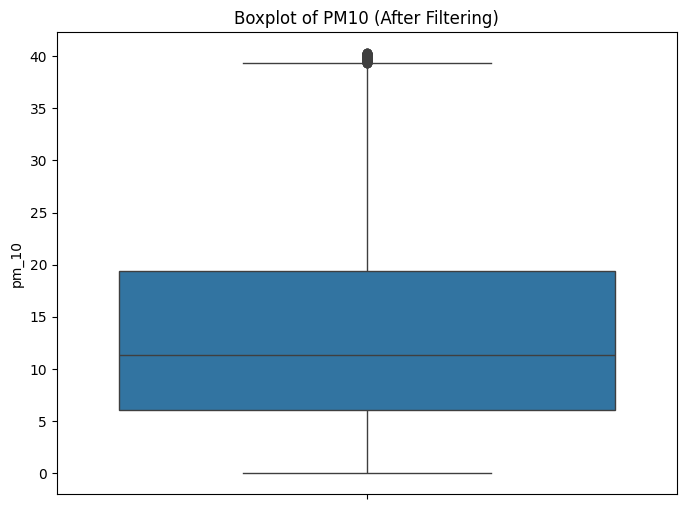

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_filtered2["pm_10"])
plt.title("Boxplot of PM10 (After Filtering)")
plt.show()

In [47]:
# คำนวณ Q1, Q3 และ IQR สำหรับ pm_10
Q1 = df_filtered2["pm_10"].quantile(0.25)
Q3 = df_filtered2["pm_10"].quantile(0.75)
IQR = Q3 - Q1

# คำนวณ lower bound และ upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ตรวจสอบแถวที่เป็น outliers
outliers = df_filtered2[(df_filtered2["pm_10"] < lower_bound) | (df_filtered2["pm_10"] > upper_bound)]

# หาค่าต่ำสุดที่เป็น outliers
min_outlier = outliers["pm_10"].min()

# แสดงค่าต่ำสุดที่เป็น outliers
print(f"ค่าต่ำสุดที่เป็น outlier: {min_outlier}")

ค่าต่ำสุดที่เป็น outlier: 39.375


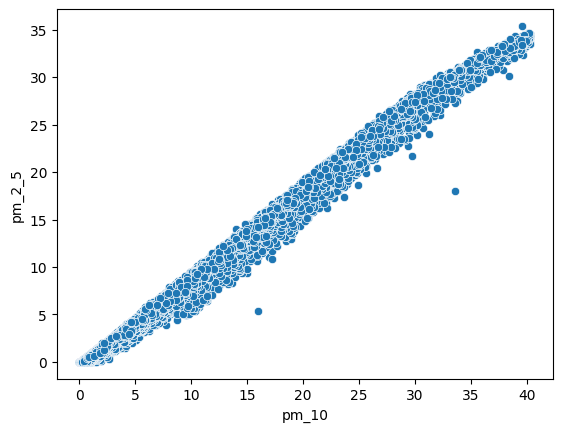

In [50]:
sns.scatterplot(x=df_filtered2["pm_10"], y=df_filtered2["pm_2_5"])
axes[2].set_title("PM2.5 vs PM10")
plt.show()

In [52]:
# คำนวณ Q1, Q3 และ IQR สำหรับ pm_10
Q1 = df["pm_10"].quantile(0.25)
Q3 = df["pm_10"].quantile(0.75)
IQR = Q3 - Q1

# คำนวณ lower bound และ upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ตรวจสอบแถวที่เป็น outliers
outliers = df[(df["pm_10"] < lower_bound) | (df["pm_10"] > upper_bound)]

# หาค่าต่ำสุดที่เป็น outliers
min_outlier = outliers["pm_10"].min()
max_outlier = outliers["pm_10"].max()
# แสดงค่าต่ำสุดที่เป็น outliers
print(f"ค่าต่ำสุดที่เป็น outlier: {min_outlier}")
print(f"ค่ามากสุดที่เป็น outlier: {max_outlier}")

ค่าต่ำสุดที่เป็น outlier: 46.25
ค่ามากสุดที่เป็น outlier: 176.3839285714286
